In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
data_dir = 'C:/Users/kingg/OneDrive/Desktop/py/data/'
train_dir = data_dir + '/train'
val_dir = data_dir + '/validation'
test_dir = data_dir + '/test'

In [3]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [4]:

# Tạo dataset
train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

In [5]:
# Tạo dataloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

In [6]:
# Xây dựng mô hình

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, len(train_data.classes))
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()

In [70]:
# Huấn luyện mô hình
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d, Loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))


Epoch 1, Loss: 1.584
Epoch 2, Loss: 0.483
Epoch 3, Loss: 0.239
Epoch 4, Loss: 0.130
Epoch 5, Loss: 0.091
Epoch 6, Loss: 0.070
Epoch 7, Loss: 0.060
Epoch 8, Loss: 0.053
Epoch 9, Loss: 0.048
Epoch 10, Loss: 0.043


In [7]:
### tải lại mô hình đã lưu

import torch
import torchvision

# Tạo mô hình giống với mô hình đã được huấn luyện trước đó
model = torchvision.models.resnet18()

# Tải trọng số mô hình đã lưu vào mô hình mới
PATH = 'traine.pth'
model.load_state_dict(torch.load(PATH))

# Sử dụng mô hình để dự đoán
input_data = torch.randn(1, 3, 224, 224)  # ví dụ input data ngẫu nhiên
output = model(input_data)


In [9]:


# Tải lại trọng số của mô hình đã lưu
PATH = 'C:/Users/kingg/OneDrive/Desktop/py/traine.pth'
model.load_state_dict(torch.load(PATH))

# Cập nhật mô hình mới với trọng số đã tải
model.eval()

total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy of the network on the test images: %d %%' % accuracy)

Accuracy of the network on the test images: 96 %


Predicted class: peas


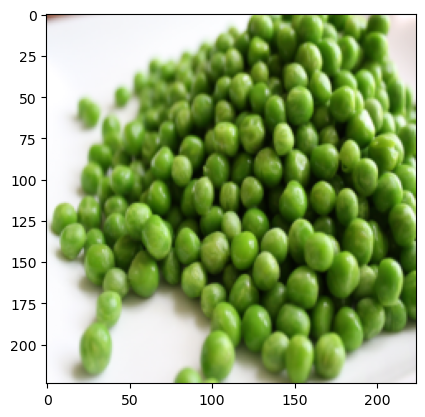

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Chọn ngẫu nhiên một hình ảnh từ tập dữ liệu test
dataiter = iter(test_loader)
for images, labels in test_loader:
    break
idx = np.random.randint(len(images))

# Hiển thị hình ảnh
img = images[idx].numpy().transpose((1, 2, 0))
img = img / 2 + 0.5  # unnormalize
plt.imshow(img)

# Dự đoán lớp của hình ảnh bằng mô hình
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)
print('Predicted class:', train_data.classes[predicted[idx]])

This is a fruit, specifically a apple


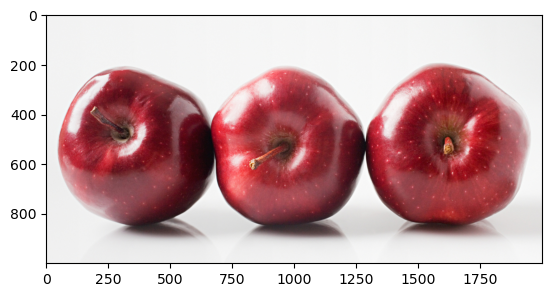

In [27]:
import torch
from PIL import Image
import torchvision.transforms as transforms

# Đọc và tiền xử lý hình ảnh đầu vào
img_path = 'C:/Users/kingg/OneDrive/Desktop/py/data/test/apple/Image_3.jpg'
img = Image.open(img_path)
plt.imshow(img)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
img_tensor = transform(img)
img_tensor = torch.unsqueeze(img_tensor, 0)

# Dùng mô hình để dự đoán
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output.data, 1)

# Chuyển đổi kết quả dự đoán sang loại rau củ hay trái cây và tên loại
class_names = train_data.classes
if predicted == 0:
    print('This is a fruit, specifically a ' + class_names[predicted])
else:
    print('This is a vegetable, specifically a ' + class_names[predicted])

In [14]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QLabel, QVBoxLayout, QHBoxLayout, QFileDialog
from PIL import Image
import torchvision.transforms as transforms
import torch
import torchvision.models as models

# Tạo ứng dụng
app = QApplication(sys.argv)
window = QWidget()
window.setWindowTitle('Fruit or Vegetable Predictor')
window.setGeometry(100, 100, 400, 200)

# Tạo các thành phần giao diện
image_path = None
image_label = QLabel('No image selected.')
image_display = QLabel()
image_display.setFixedSize(224, 224)
browse_button = QPushButton('Browse...')
predict_button = QPushButton('Predict')
result_label = QLabel('')

# Xử lý sự kiện khi nút "Browse" được nhấn
def browse_image():
    global image_path
    options = QFileDialog.Options()
    options |= QFileDialog.DontUseNativeDialog
    file_path, _ = QFileDialog.getOpenFileName(window, "Select Image", "", "Image Files (*.jpg *.jpeg *.png *.bmp)", options=options)
    if file_path:
        image_path = file_path
        image_label.setText('Selected image: ' + image_path)
        image = Image.open(image_path)
        image = image.resize((224, 224))
        image_display.setPixmap(image)
        
# Xử lý sự kiện khi nút "Predict" được nhấn
def predict_image():
    if image_path:
        # Đọc và tiền xử lý hình ảnh đầu vào
        img = Image.open(image_path)
        transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        img_tensor = transform(img)
        img_tensor = torch.unsqueeze(img_tensor, 0)

        # Dùng mô hình để dự đoán
        model.eval()
        with torch.no_grad():
            output = model(img_tensor)
            _, predicted = torch.max(output.data, 1)

        # Chuyển đổi kết quả dự đoán sang loại rau củ hay trái cây và tên loại
        class_names = train_data.classes
        if predicted == 0:
            result_label.setText('This is a fruit, specifically a ' + class_names[0])
        else:
            result_label.setText('This is a vegetable, specifically a ' + class_names[1])
    else:
        result_label.setText('Please select an image first.')
    

# Kết nối các thành phần với sự kiện
browse_button.clicked.connect(browse_image)
predict_button.clicked.connect(predict_image)

# Bố trí các thành phần trên cửa sổ giao diện
image_layout = QVBoxLayout()
image_layout.addWidget(image_label)
image_layout.addWidget(image_display)

button_layout = QHBoxLayout()
button_layout.addWidget(browse_button)

button_layout = QHBoxLayout()
button_layout.addWidget(browse_button)
button_layout.addWidget(predict_button)

main_layout = QVBoxLayout()
main_layout


: 

: 

In [87]:
import torch
import torch.nn as nn
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Tải lại trạng thái của mô hình
state_dict = torch.load('traine.pth')

# Xây dựng mô hình Keras
keras_model = Sequential([    Flatten(input_shape=(224, 224, 3)),    Dense(64, activation='relu', input_shape=(4,)),    Dense(10, activation='softmax')])

# Sao chép trọng số của mô hình từ PyTorch sang Keras
for i, layer in enumerate(keras_model.layers):
    if i in state_dict:
        layer.set_weights([state_dict[i].numpy(), state_dict[i+'_bias'].numpy()])

# Lưu mô hình Keras
keras_model.save('test.h5')
